# BIG DATA Assignment (CREDIT CARD APPROVAL)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding 

In [2]:
# Reading the data
records_data = pd.read_csv("application_record.csv",encoding= 'unicode_escape')
credit_data = pd.read_csv("credit_record.csv",encoding= 'unicode_escape')

In [3]:
records_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [4]:
records_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557,438557.000000,438557.000000,438557.000000,438557.000000
mean,6022176.269842,0.427390,187524.286010,-15997.904649,60563.675328,1,0.206133,0.287771,0.108207,2.194465
std,571637.023257,0.724882,110086.853066,4185.030007,138767.799647,0,0.404527,0.452724,0.310642,0.897207
min,5008804.000000,0.000000,26100.000000,-25201.000000,-17531.000000,1,0.000000,0.000000,0.000000,1.000000
25%,5609375.000000,0.000000,121500.000000,-19483.000000,-3103.000000,1,0.000000,0.000000,0.000000,2.000000
50%,6047745.000000,0.000000,160780.500000,-15630.000000,-1467.000000,1,0.000000,0.000000,0.000000,2.000000
75%,6456971.000000,1.000000,225000.000000,-12514.000000,-371.000000,1,0.000000,1.000000,0.000000,3.000000
max,7999952.000000,19.000000,6750000.000000,-7489.000000,365243.000000,1,1.000000,1.000000,1.000000,20.000000


In [5]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
credit_data.describe()

,ID,MONTHS_BALANCE
count,1048575.000000,1048575.000000
mean,5068286.424673,-19.136998
std,46150.578505,14.023498
min,5001711.000000,-60.000000
25%,5023644.000000,-29.000000
50%,5062104.000000,-17.000000
75%,5113856.000000,-7.000000
max,5150487.000000,0.000000


## 2. Data Preparation

In [7]:
'''
STATUS (in credit_data)
0: 1-29 days past due 
1: 30-59 days past due 
2: 60-89 days overdue 
3: 90-119 days overdue 
4: 120-149 days overdue 
5: Overdue or bad debts,more than 150 days 
C: paid off that month 
X: No loan for the month
'''
indexNames = credit_data[credit_data['STATUS'] == 'X' ].index
#To get rows with Status = X

credit_data.drop(indexNames, inplace = True)
#As Status = X means no loan that month, hence we are deleting rows with Status = X


In [8]:
credit_data['OUTPUT'] = 'Not_Approved'
credit_data['OUTPUT'][credit_data['STATUS'] =='C']= 'Approved'
# As STATUS = C means the loadn is paid off, hence is approved to get a Credit Card

In [9]:
# Change 'STATUS' column to numeric
credit_data.loc[credit_data['STATUS'] == 'C', 'STATUS'] = '-1'
credit_data['STATUS'] = pd.to_numeric(credit_data['STATUS'])
credit_data['STATUS'] = credit_data['STATUS'] + 1

credit_data.head()

,ID,MONTHS_BALANCE,STATUS,OUTPUT
1,5001711,-1,1,Not_Approved
2,5001711,-2,1,Not_Approved
3,5001711,-3,1,Not_Approved
4,5001712,0,0,Approved
5,5001712,-1,0,Approved


Approved        442031
Not_Approved    397314
Name: OUTPUT, dtype: int64


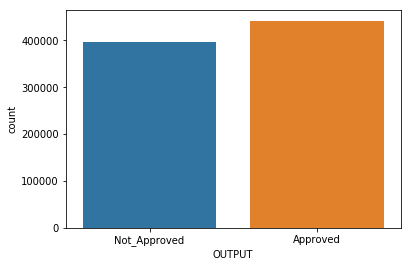

In [10]:
sns.countplot(data = credit_data, x = 'OUTPUT')
print(credit_data['OUTPUT'].value_counts())

In [11]:
credit_data['OUTPUT'] = credit_data['OUTPUT'].replace(['Not_Approved','Approved'],[0,1])
grouped_data = credit_data.groupby(['ID']).mean() 
# Group by ID
grouped_data.index.name = 'ID'
grouped_data.reset_index(inplace = True)
grouped_data.head()

,ID,MONTHS_BALANCE,STATUS,OUTPUT
0,5001711,-2.000000,1.000000,0.000000
1,5001712,-9.000000,0.526316,0.473684
2,5001717,-10.500000,0.772727,0.227273
3,5001718,-18.724138,0.965517,0.103448
4,5001719,-21.000000,0.046512,0.953488


In [12]:
#merging both the tables
df = pd.merge(records_data, grouped_data, on = 'ID')
data = pd.merge(records_data, grouped_data, on = 'ID')
#dropping some parametrs that have no effect on the outcome
df.drop(["ID"],axis=1,inplace=True)

In [13]:
df['OUTPUT'].values[df['OUTPUT'].values > 0.5] = 1
df['OUTPUT'].values[df['OUTPUT'].values <= 0.5] = 0

df['OUTPUT'] = df['OUTPUT'].replace([0,1],['Not_Approved','Approved'])

df.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,OUTPUT
0,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-7.000000,0.200000,Approved
1,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-6.500000,0.214286,Approved
2,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-9.571429,0.500000,Not_Approved
3,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-1.000000,1.000000,Not_Approved
4,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-10.761905,0.285714,Approved
5,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-16.484848,0.181818,Approved
6,F,N,Y,0,283500,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,-12.357143,1.000000,Not_Approved
7,F,N,Y,0,283500,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,-8.357143,1.000000,Not_Approved
8,F,N,Y,0,283500,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,-9.357143,1.000000,Not_Approved
9,M,Y,Y,0,270000,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2,-2.500000,1.000000,Not_Approved


## 3. Data description and analysis

F    22220
M    10890
Name: CODE_GENDER, dtype: int64


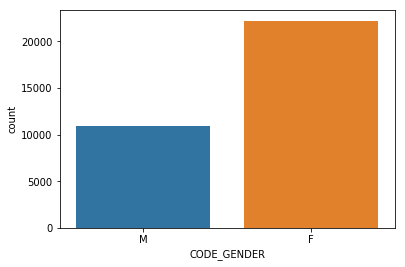

In [14]:
sns.countplot(data = df, x = 'CODE_GENDER')
print(df['CODE_GENDER'].value_counts())

Bar Plot: A barplot (or barchart) is one of the most common type of plot. It shows the relationship between a numerical variable and a categorical variable.Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value. 

In [15]:
df['OUTPUT'] = df['OUTPUT'].replace(['Not_Approved','Approved'],[0,1])
#This will change Approved and Not_Approved into 1,0 respectively, so that we can plot it in BarPlot

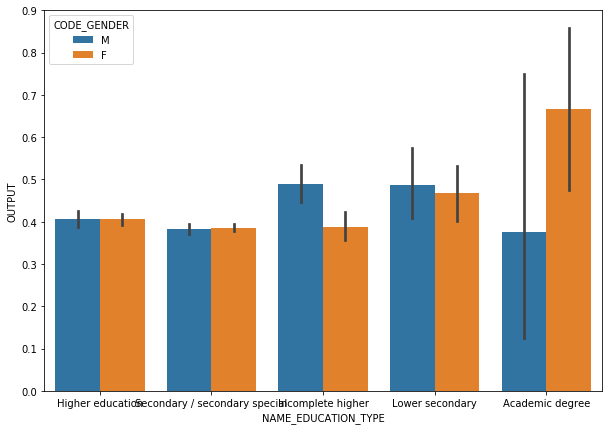

In [16]:
plt.figure(figsize=(10,7))
bar_age=sns.barplot(x='NAME_EDUCATION_TYPE',y='OUTPUT',hue='CODE_GENDER',data=df)

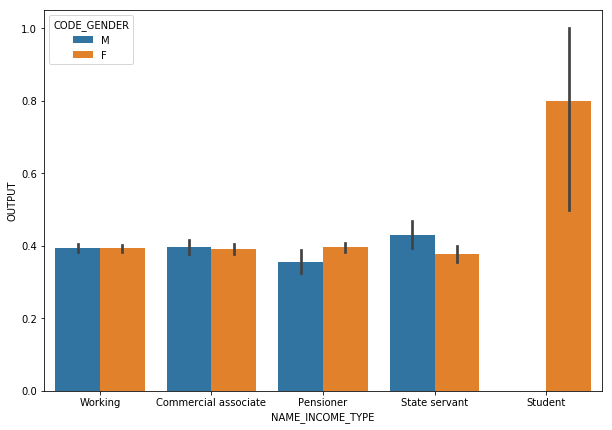

In [17]:
plt.figure(figsize=(10,7))
bar_age=sns.barplot(x='NAME_INCOME_TYPE',y='OUTPUT',hue='CODE_GENDER',data=df)

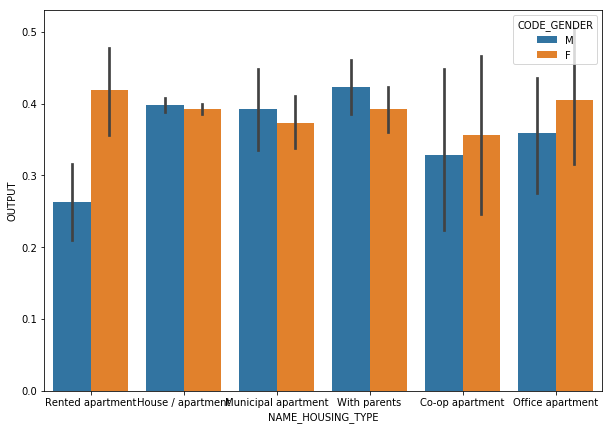

In [18]:
plt.figure(figsize=(10,7))
bar_age=sns.barplot(x='NAME_HOUSING_TYPE',y='OUTPUT',hue='CODE_GENDER',data=df)

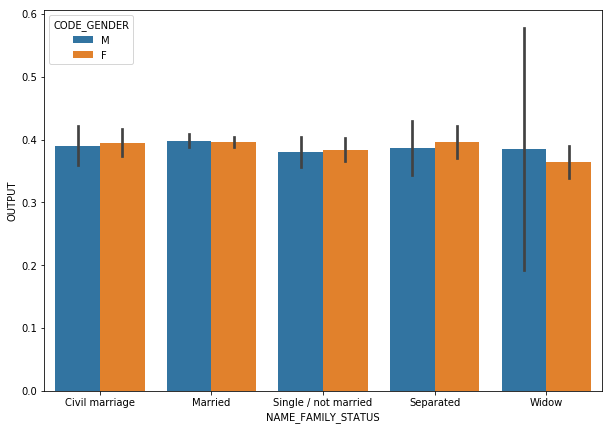

In [19]:
plt.figure(figsize=(10,7))
bar_age=sns.barplot(x='NAME_FAMILY_STATUS',y='OUTPUT',hue='CODE_GENDER',data=df)

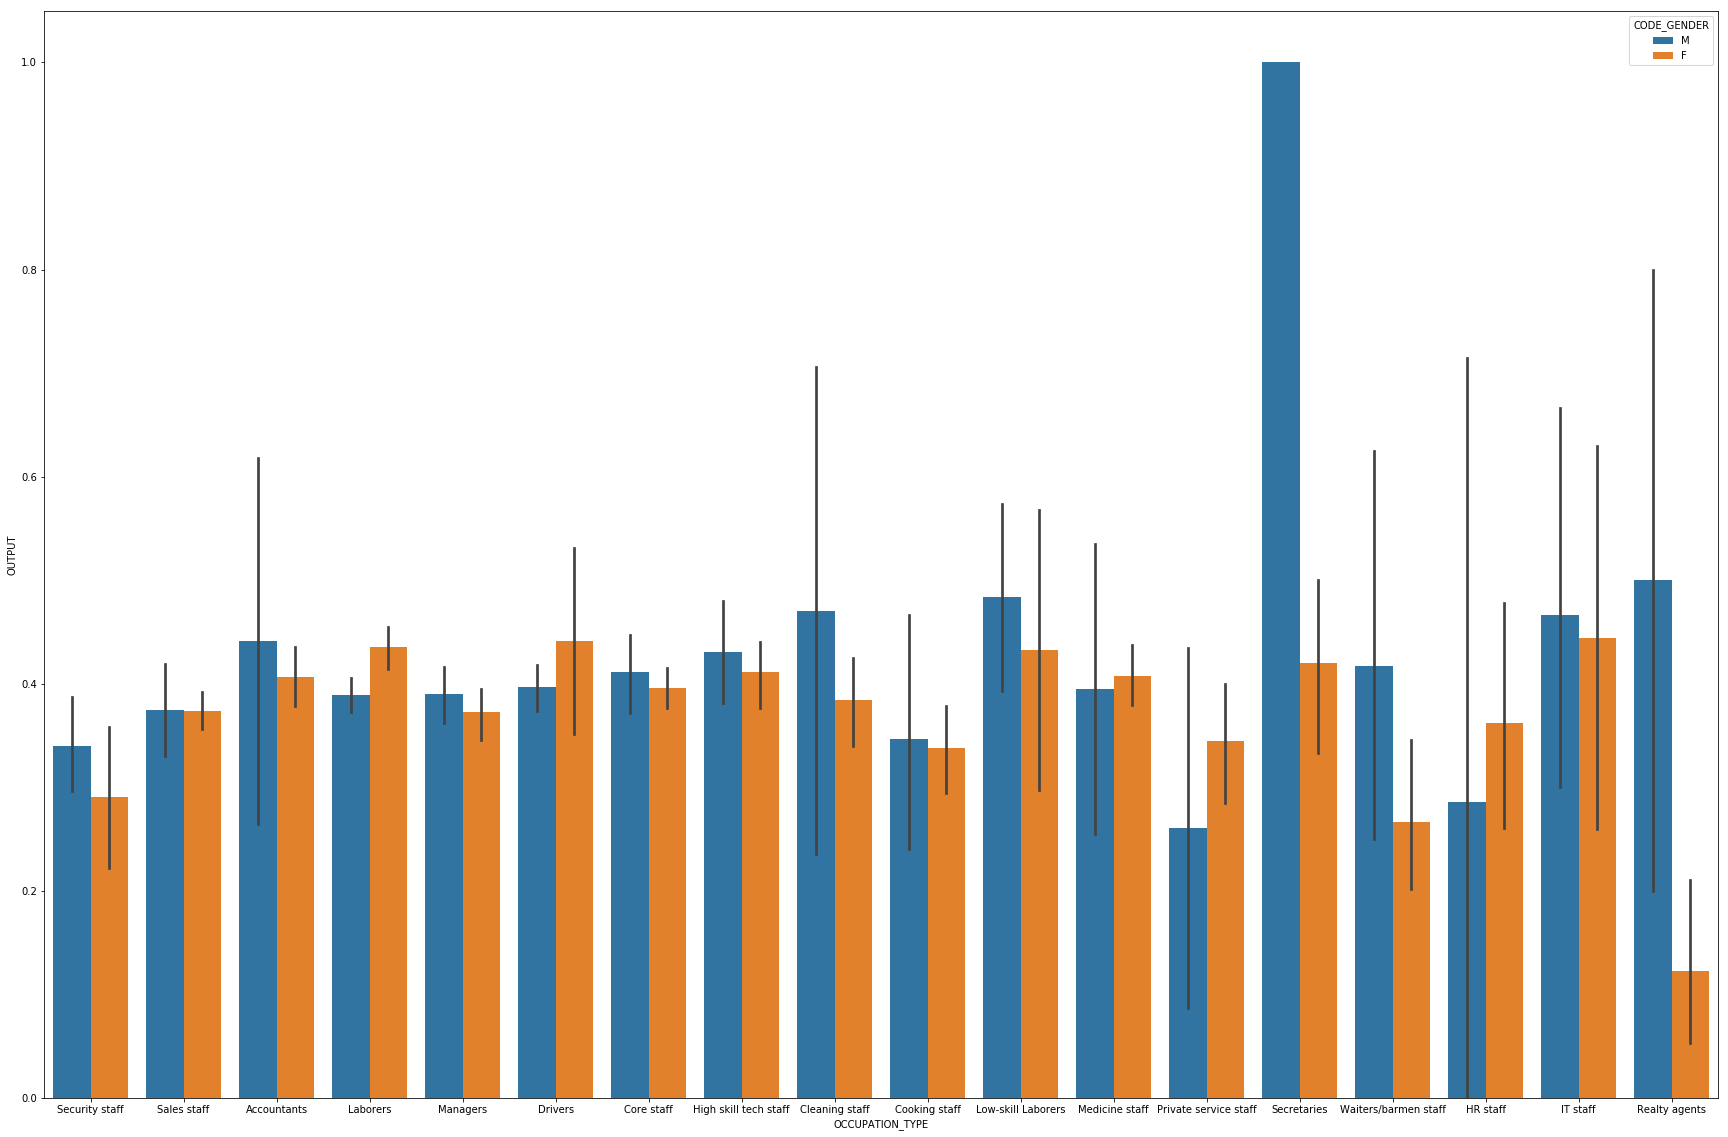

In [20]:
plt.figure(figsize=(30,20))
bar_age=sns.barplot(x='OCCUPATION_TYPE',y='OUTPUT',hue='CODE_GENDER',data=df)

Labor Work        9502
Office Work       9214
High-tech Work    4021
Name: OCCUPATION_TYPE, dtype: int64


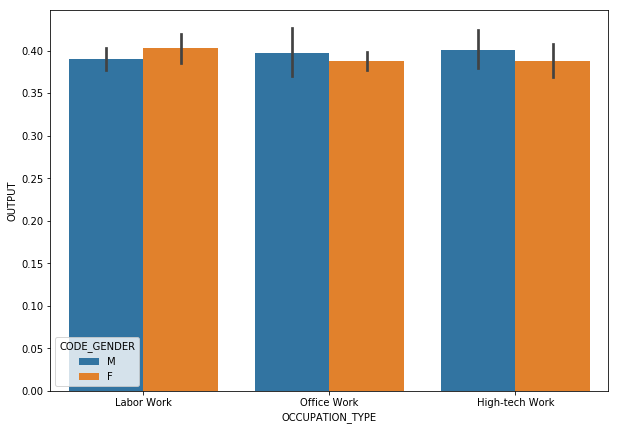

In [21]:
df.loc[(df['OCCUPATION_TYPE']=='Cleaning staff') | (df['OCCUPATION_TYPE']=='Cooking staff') | (df['OCCUPATION_TYPE']=='Drivers') | (df['OCCUPATION_TYPE']=='Laborers') | (df['OCCUPATION_TYPE']=='Low-skill Laborers') | (df['OCCUPATION_TYPE']=='Security staff') | (df['OCCUPATION_TYPE']=='Waiters/barmen staff'),'OCCUPATION_TYPE']='Labor Work'
df.loc[(df['OCCUPATION_TYPE']=='Accountants') | (df['OCCUPATION_TYPE']=='Core staff') | (df['OCCUPATION_TYPE']=='HR staff') | (df['OCCUPATION_TYPE']=='Medicine staff') | (df['OCCUPATION_TYPE']=='Private service staff') | (df['OCCUPATION_TYPE']=='Realty agents') | (df['OCCUPATION_TYPE']=='Sales staff') | (df['OCCUPATION_TYPE']=='Secretaries'),'OCCUPATION_TYPE']='Office Work'
df.loc[(df['OCCUPATION_TYPE']=='Managers') | (df['OCCUPATION_TYPE']=='High skill tech staff') | (df['OCCUPATION_TYPE']=='IT staff'),'OCCUPATION_TYPE']='High-tech Work'
print(df['OCCUPATION_TYPE'].value_counts())
      
plt.figure(figsize=(10,7))
bar_age=sns.barplot(x='OCCUPATION_TYPE',y='OUTPUT',hue='CODE_GENDER',data=df)

Distplot: Distplot lets you show a histogram with a line on it. A distplot plots a univariate distribution of observations.This can be shown in all kinds of variations. We use seaborn in combination with matplotlib(the Python plotting module)

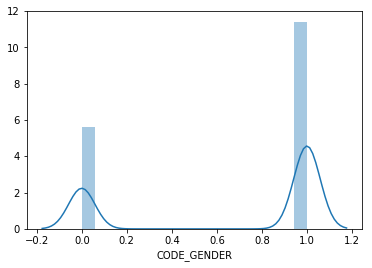

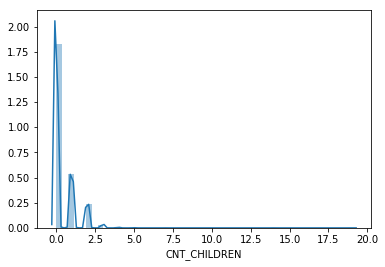

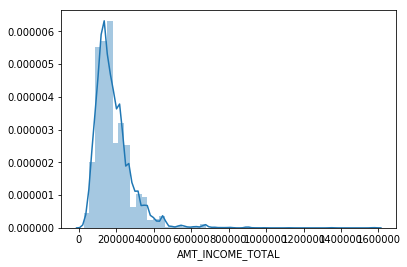

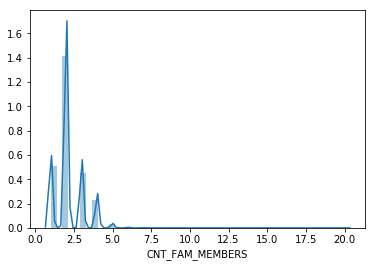

In [22]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['M','F'],[0,1])
#This will replace M with 0 and F with 1
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
plotDistPlot(df['CODE_GENDER'])
plotDistPlot(df['CNT_CHILDREN'])
plotDistPlot(df['AMT_INCOME_TOTAL'])
plotDistPlot(df['CNT_FAM_MEMBERS'])

In [23]:
df['OUTPUT'] = df['OUTPUT'].replace([0,1],['Not_Approved','Approved'])

Scatter Plot: A Scatter (XY) Plot has points that show the relationship between two sets of data, where each value in the data set is represented by a dot. In python,The Matplotlib module has a method for drawing scatter plots, it needs two arrays of the same length, one for the values of the x-axis, and one for the values of the y-axis

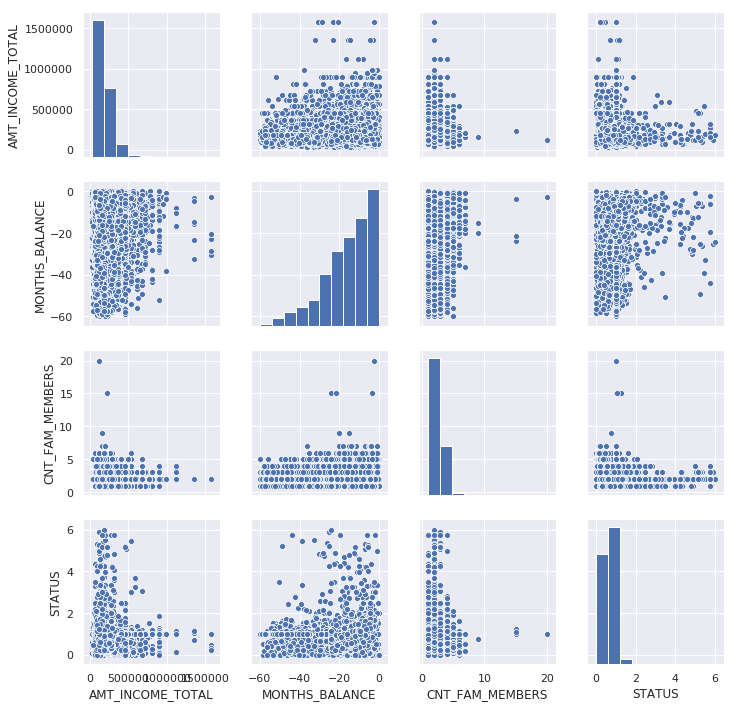

In [24]:
sns.set()
cols = ['AMT_INCOME_TOTAL', 'MONTHS_BALANCE','CNT_FAM_MEMBERS' ,'STATUS']
sns.pairplot(df[cols], height = 2.5)
plt.show();

CatPlot: This plot provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations

<Figure size 864x504 with 0 Axes>

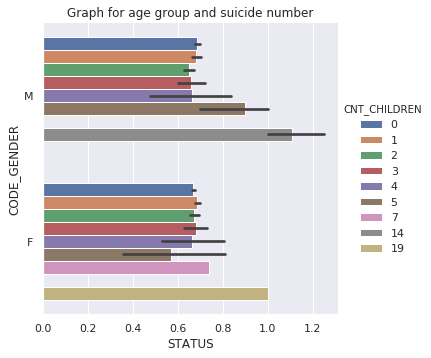

In [25]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace([0,1],['M','F'])

plt.figure(figsize=(12,7))
sns.catplot(y="CODE_GENDER",x="STATUS",hue="CNT_CHILDREN",data=df,kind="bar")
plt.title('Graph for age group and suicide number')
plt.show()

<Figure size 864x504 with 0 Axes>

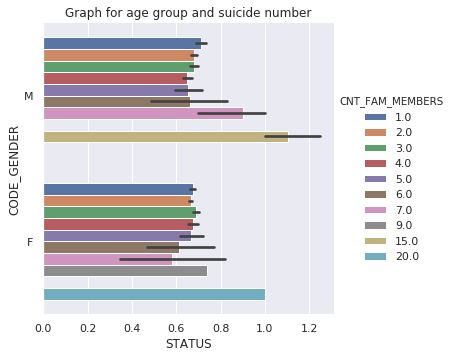

In [26]:
plt.figure(figsize=(12,7))
sns.catplot(y="CODE_GENDER",x="STATUS",hue="CNT_FAM_MEMBERS",data=df,kind="bar")
plt.title('Graph for age group and suicide number')
plt.show()


Joint Plot: Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

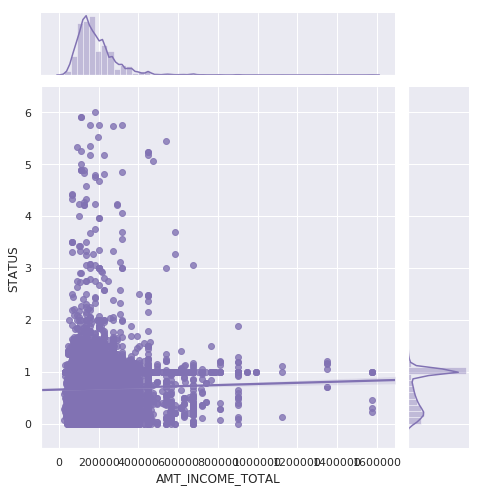

In [27]:
g=sns.jointplot("AMT_INCOME_TOTAL","STATUS",data=df,kind="reg",color="m",height=7)

BoxPlot: A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles

BoxenPlot: Draw an enhanced box plot for larger datasets.

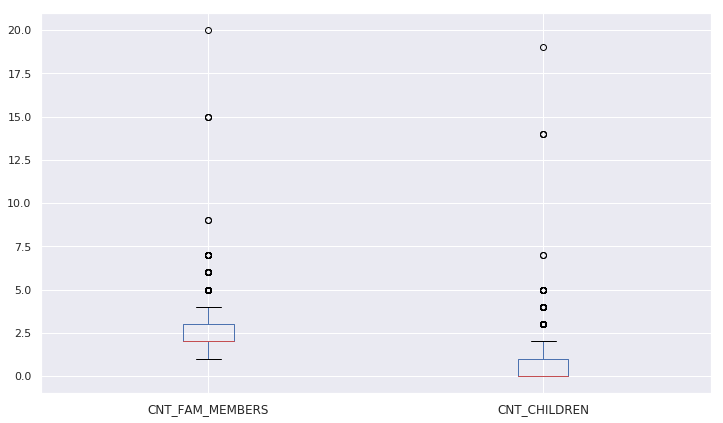

In [28]:
plt.figure(figsize=(12,7))
boxplot = df.boxplot(column=['CNT_FAM_MEMBERS','CNT_CHILDREN'])
plt.show()

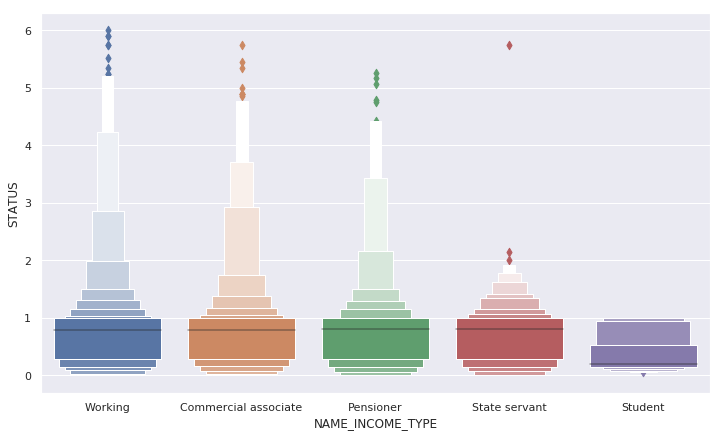

In [29]:
plt.figure(figsize=(12,7))
sns.boxenplot(x="NAME_INCOME_TYPE",y="STATUS",scale="linear",data=df)
plt.show()

Correlation Matrix: A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

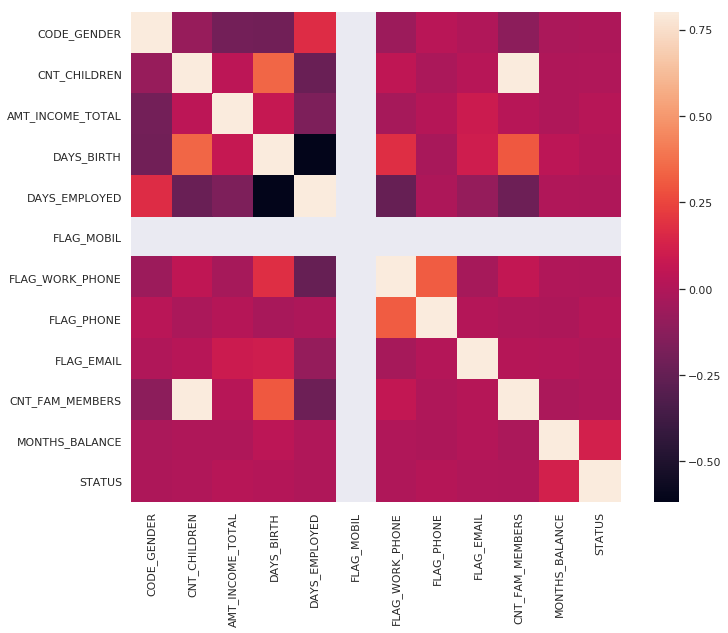

In [30]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['M','F'],[0,1])
df['OUTPUT'] = df['OUTPUT'].replace([0,1],['Not_Approved','Approved'])

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [31]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

2.5452      20501
18.1800     10273
33.6600      1879
49.1400       236
64.6200       153
80.1000        47
95.5800         4
111.0600        3
126.5400        6
142.0200        8
Name: AMT_INCOME_TOTAL, dtype: int64


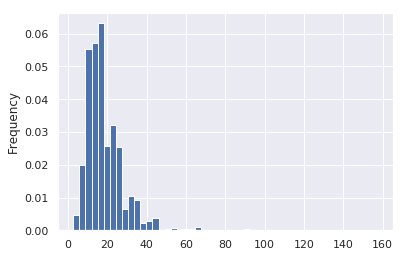

In [32]:
data2 = df.copy()
data['AMT_INCOME_TOTAL']=data['AMT_INCOME_TOTAL'].astype(object)
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL']/10000 
print(data['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
data['AMT_INCOME_TOTAL'].plot(kind='hist',bins=50,density=True)

## 4. Data Modeling and Evaluation

In [33]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

df = pd.get_dummies(df)

In [34]:
df.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_High-tech Work,OCCUPATION_TYPE_Labor Work,OCCUPATION_TYPE_Office Work,OUTPUT_Approved,OUTPUT_Not_Approved
0,0,1,1,0,427500,-12005,-4542,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,1,0,427500,-12005,-4542,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,112500,-21474,-1134,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,1,0,1,0,270000,-19110,-3051,1,0,1,...,1,0,0,0,0,0,0,1,0,1
4,1,0,1,0,270000,-19110,-3051,1,0,1,...,1,0,0,0,0,0,0,1,1,0
5,1,0,1,0,270000,-19110,-3051,1,0,1,...,1,0,0,0,0,0,0,1,1,0
6,1,0,1,0,283500,-22464,365243,1,0,0,...,1,0,0,0,0,0,0,0,0,1
7,1,0,1,0,283500,-22464,365243,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8,1,0,1,0,283500,-22464,365243,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9,0,1,1,0,270000,-16872,-769,1,1,1,...,1,0,0,0,0,0,0,1,0,1


In [35]:
df.drop(["STATUS","NAME_INCOME_TYPE_Working","NAME_EDUCATION_TYPE_Secondary / secondary special","NAME_FAMILY_STATUS_Widow","NAME_HOUSING_TYPE_With parents","OCCUPATION_TYPE_Office Work","OUTPUT_Not_Approved"],axis=1,inplace=True)

In [36]:
df.isnull().sum()

CODE_GENDER                                0
FLAG_OWN_CAR                               0
FLAG_OWN_REALTY                            0
CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
DAYS_BIRTH                                 0
DAYS_EMPLOYED                              0
FLAG_MOBIL                                 0
FLAG_WORK_PHONE                            0
FLAG_PHONE                                 0
FLAG_EMAIL                                 0
CNT_FAM_MEMBERS                            0
MONTHS_BALANCE                             0
NAME_INCOME_TYPE_Commercial associate      0
NAME_INCOME_TYPE_Pensioner                 0
NAME_INCOME_TYPE_State servant             0
NAME_INCOME_TYPE_Student                   0
NAME_EDUCATION_TYPE_Academic degree        0
NAME_EDUCATION_TYPE_Higher education       0
NAME_EDUCATION_TYPE_Incomplete higher      0
NAME_EDUCATION_TYPE_Lower secondary        0
NAME_FAMILY_STATUS_Civil marriage          0
NAME_FAMIL

In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.7121715493808517
      0     1
0  4945  1183
1  1676  2129
[[0.8069517  0.1930483 ]
 [0.44047306 0.55952694]]


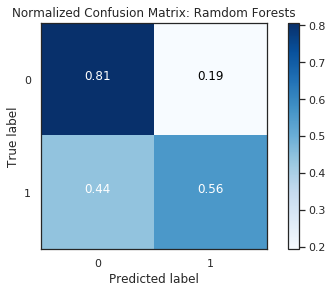

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rffit = rf.fit(X_train, y_train)
y_predict = rffit.predict(X_test)
print('Accuracy Score is', accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style("white") 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Ramdom Forests')

Feature ranking:
1. feature 12 (0.372389)
2. feature 5 (0.146793)
3. feature 6 (0.112608)
4. feature 4 (0.111248)
5. feature 11 (0.022783)
6. feature 1 (0.017962)
7. feature 9 (0.017712)
8. feature 0 (0.017271)
9. feature 3 (0.016952)
10. feature 2 (0.015917)
11. feature 13 (0.014659)
12. feature 8 (0.014537)
13. feature 18 (0.014320)
14. feature 31 (0.014169)
15. feature 10 (0.011486)
16. feature 30 (0.010637)
17. feature 22 (0.009681)
18. feature 26 (0.009348)
19. feature 15 (0.008769)
20. feature 24 (0.007316)
21. feature 21 (0.006437)
22. feature 23 (0.005881)
23. feature 19 (0.005229)
24. feature 14 (0.004628)
25. feature 27 (0.003620)
26. feature 29 (0.002338)
27. feature 20 (0.002155)
28. feature 28 (0.001717)
29. feature 25 (0.000933)
30. feature 17 (0.000336)
31. feature 16 (0.000171)
32. feature 7 (0.000000)


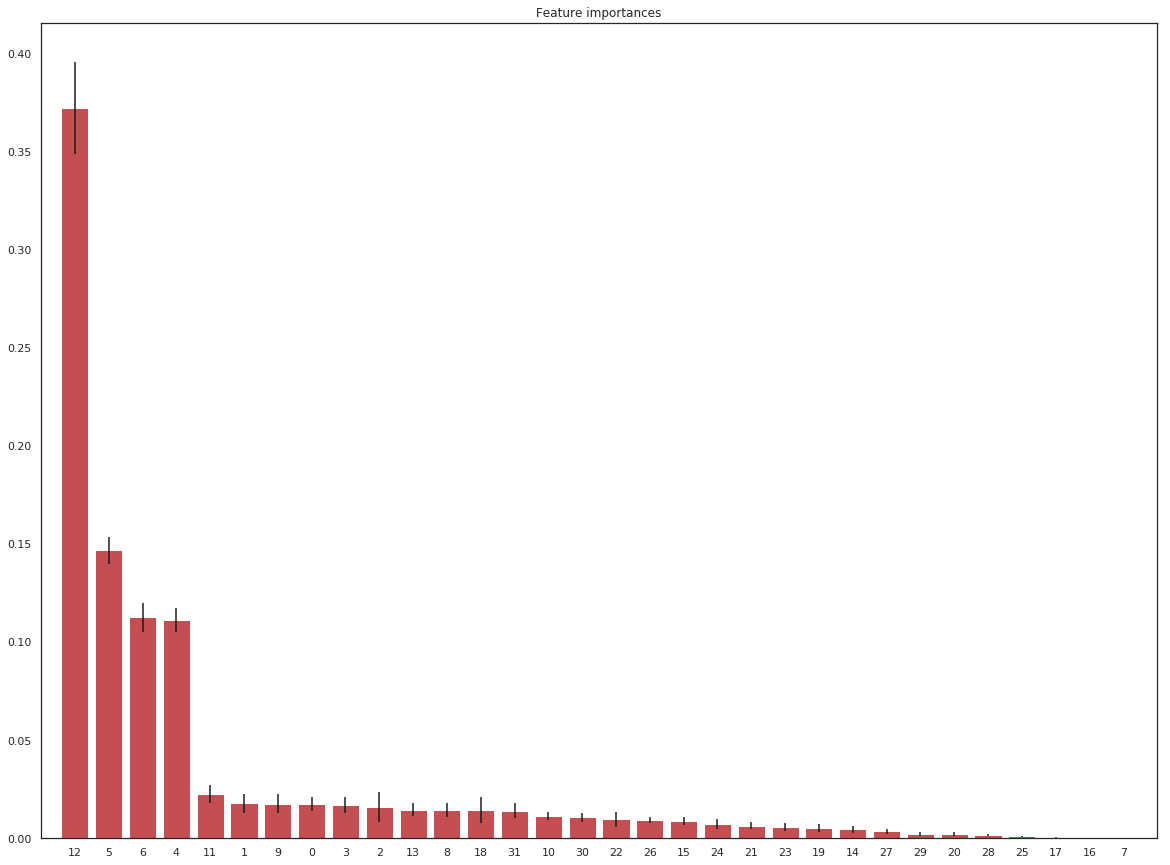

In [41]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,15))
#plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [42]:
data2.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,OUTPUT
0,0,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-7.000000,0.200000,Approved
1,0,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-6.500000,0.214286,Approved
2,0,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Labor Work,2,-9.571429,0.500000,Not_Approved
3,1,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Office Work,1,-1.000000,1.000000,Not_Approved
4,1,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Office Work,1,-10.761905,0.285714,Approved


### Prediction

In [43]:
"""
# 0 = No
# 1 = Yes
Various Input Parameters with their codes:

Female: (1)
Car : (1)
Realty : (0)
No. of Childrens: (2)
Income: (2,70,000)
Age, 52 years that is 19110 no of days : (-19110)
Employed days : (365)
Mobile : (1)
Work Phone : (0)
Phone: (0)
Family Members: (4)
Savings/Balance, Rs. 7,000 : (-7000) 
Current job is Pensioner : (0,1,0,0)
Eductaion is Higher Education : (0,1,0,0)
Marital Status is Married : (0,1,0,0)
Lives in an house/appartment : (0,1,0,0,0)
Type of occupation before was office work : (0,0)


Input Data : [1,1,0,2,270000,-19110,365,1,0,0,1,4,-7000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0]

"""
new_prediction = rffit.predict(sc.transform(np.array([[1,1,0,2,270000,-19110,365,1,0,0,1,4,-7000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
]])))
#print (new_prediction)
if new_prediction == 1.0 :
    print("Approved")
else:
    print("Not_Approved")


Not_Approved
